# Gaussian Discriminant Analysis (GDA)
Sean Wade

GDA, is a method for data classification used when data can be approximated with a Normal distribution.

In [64]:
from __future__ import print_function, division
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm
import matplotlib as 
from matplotlib import pyplot as plt
from scipy import linalg as la
import seaborn as sns
%matplotlib inline

In [3]:
data = np.array(
    [[1.25503297, 1.57903564, True],
    [1.63028635, -1.18508514, True],
    [1.79463974, -0.55001356, True],
    [-1.81346613, -0.77324008, False],
    [1.69922689, -1.42632924, True],
    [-1.75712469, 0.82997535, False],
    [-0.08134118, 1.57007532, True],
    [1.62926894, 1.28724524, True],
    [-0.44569194, 1.76316174, True],
    [1.91136215, -1.07970123, True],
    [0.6066087, -1.69438009, False],
    [-1.43463181, 0.83402986, False],
    [0.2355939, -0.09188478, False],
    [-1.48938399, -1.36657962, False],
    [1.48418589, 0.66919793, True],
    [0.79687181, -1.32979338, False],
    [-0.17334499, -1.71251662, False],
    [0.22557811, 1.51725432, True],
    [-0.96541099, 0.93572258, False],
    [-0.17724504, -0.66688243, False]])

x = data[:,:2]
y = data[:,2]

In [7]:
class GDA:
    """Gaussian Discriminant Analysis binary classifier.
    Methods:
    fit: Fits the model to the data by setting state
    variables to be used by the predict method.
    predict: Makes a prediction for a new sample using
    the model constructed by fit.
    """
    def fit(self, x, y):
        """Fit the model to the data
        args:
            x: array of data. x.shape should be (N,m) with m features and N data
            y: array of binary labels. Should have shape (N,1)
        """
        N, m = x.shape
        self.mu_hat_1 = np.mean(x[y==1], axis=0)
        self.sigma_hat_1 = np.cov(x[y==1], rowvar=False, ddof=1)
        self.pi_hat_1 = np.sum(y[y==1]) / N
        
        self.mu_hat_0 = np.mean(x[y==0], axis=0)
        self.sigma_hat_0 = np.cov(x[y==0], rowvar=False, ddof=1)
        self.pi_hat_0 = 1 - self.pi_hat_1
        
        
    def predict(self, x):
        """Use the model to make a prediction.
        Args:
            x: the test point. Has the shape (m,)
        Returns:
            tuple: consisting of p(y==True|w,x) and p(y==False|w,x)
        """
        m = len(x)
        prob_0 = self.pi_hat_0 * multivariate_normal.pdf(x, mean=self.mu_hat_0, cov=c)
        prob_1 = self.pi_hat_1 * multivariate_normal.pdf(x, mean=self.mu_hat_1, cov=self.sigma_hat_1)
        return prob_1 / (prob_1 + prob_0)

In [18]:
# Now use the test data
test_data = [np.array(a) for a in [[0,0], [1,1], [-1,-1]]]
gda = GDA()
gda.fit(x, y)
for test in test_data:
    result = gda.predict(np.array(test))
    print("{}: {}".format(test, result*1e2))

[0 0]: 15.383657458
[1 1]: 99.1706415706
[-1 -1]: 0.00159623931664


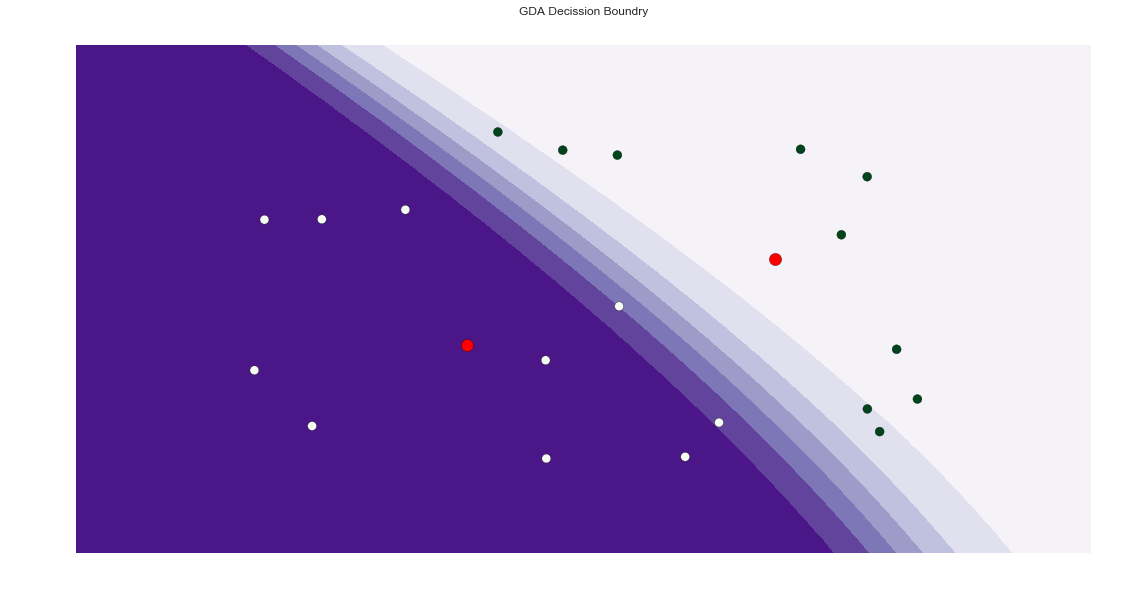

In [48]:
# Plot the Decision Boundry
h=.1
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# here "model" is your model's prediction (classification) function
Z = gda.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
plt.figure(figsize=(20,10))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Purples_r)
plt.axis('off')
plt.scatter(x[:, 0], x[:, 1], s=80, c=y, cmap=plt.cm.Greens)
plt.scatter(gda.mu_hat_0[0], gda.mu_hat_0[1], c='red', s=150)
plt.scatter(gda.mu_hat_1[0], gda.mu_hat_1[1], c='red', s=150)
plt.title("GDA Decission Boundry")
plt.show()